# Best Feature Selection techniques that gives good results and easy to use.

**1. Univariate Selection**

In [62]:
import numpy as np
import pandas as pd

In [63]:
df1 = pd.read_csv('mobile_train.csv')
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [64]:
X = df1.drop('price_range',axis = 1)
y = df1['price_range']
from sklearn.feature_selection import SelectKBest, chi2 
best_features = SelectKBest(score_func = chi2, k = 10)    # finds 10 best features w.r.t target output
fit = best_features.fit(X,y)

In [65]:
df1scores = pd.DataFrame(fit.scores_)
df1columns = pd.DataFrame(X.columns)

In [66]:
df2 = pd.concat([df1columns,df1scores],axis = 1)
df2.columns = ['Specs','Score']
df2

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [67]:
df2.nlargest(10,'Score')

,Specs,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


**2. Feature Importance**

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
classifier.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [69]:
classifier.feature_importances_

array([0.05957146, 0.02009602, 0.03349007, 0.0199502 , 0.03366158,
       0.01740606, 0.03583224, 0.03357194, 0.03712107, 0.03367733,
       0.03423198, 0.0474201 , 0.04918711, 0.38380889, 0.03499393,
       0.03454262, 0.0365503 , 0.01517184, 0.01894259, 0.02077266])

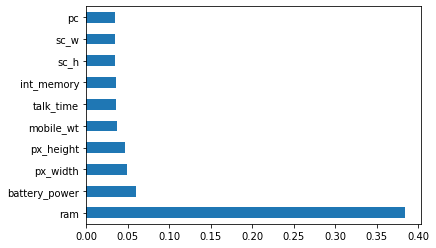

In [70]:
feat_imp = pd.Series(classifier.feature_importances_,index= X.columns)
df3 = feat_imp.nlargest(10)
import matplotlib.pyplot as plt
df3.plot(kind = 'barh')
plt.show()

**3. Correlation Matrix with Heatmap**

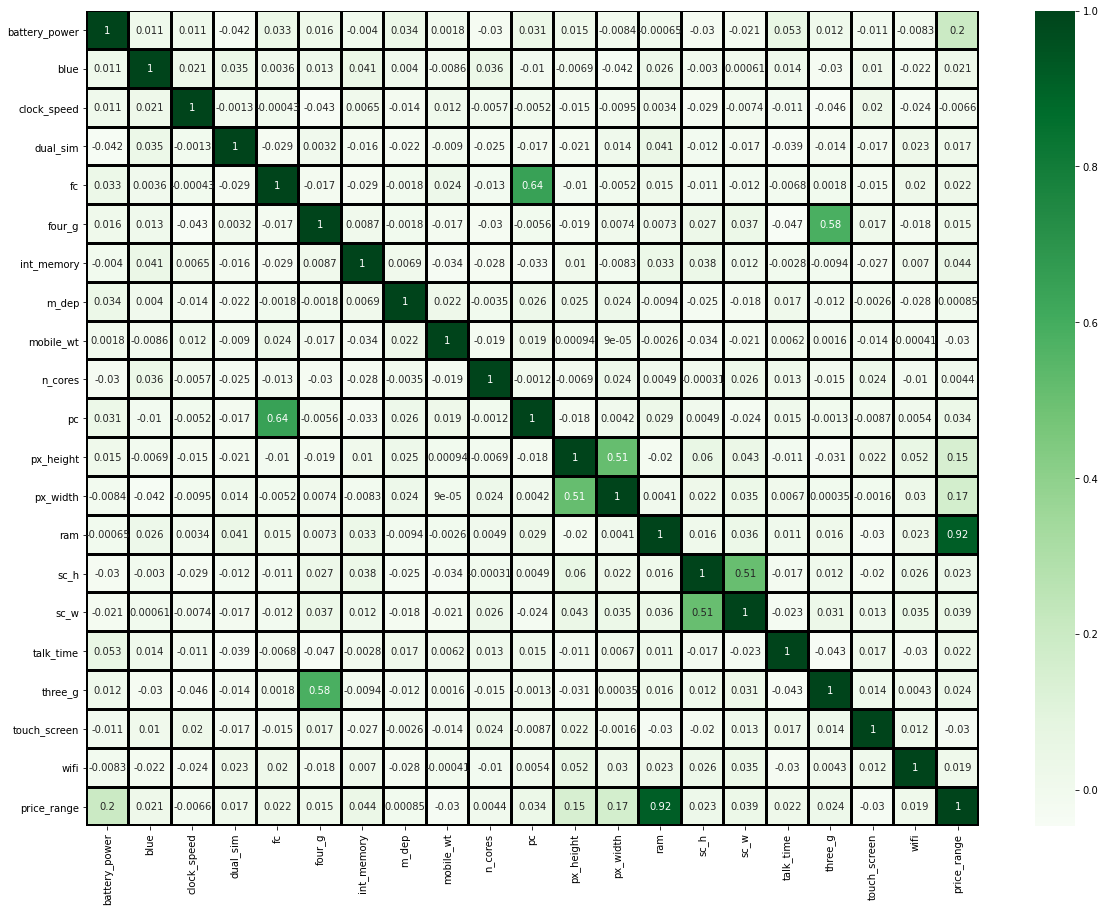

In [73]:
import seaborn as  sns
plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(),annot = True,cmap = 'Greens',linewidths=2, linecolor='black')
plt.show()